In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Download stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset

In [ ]:
# Load dataset

import pandas as pd
df = pd.read_csv("/content/sample_data/labeled_data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/labeled_data.csv'

In [ ]:
# Check dataset info

df.info()


NameError: name 'df' is not defined

In [ ]:
df.columns = ['index', 'count', 'hate_speech', 'offensive_language', 'neither', 'label', 'text']


In [ ]:
# Drop index column

df = df.drop(columns=['index'])


In [ ]:
# Mapping labels: 0 = Hate Speech, 1 = Offensive Language, 2 = Neither

df['label'].replace({0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}, inplace=True)


<ipython-input-7-bf38fc585e76>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace({0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}, inplace=True)


<ipython-input-8-c09d2b0db506>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


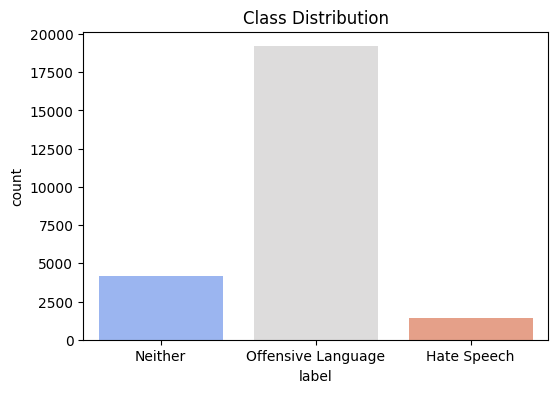

In [ ]:
# Display class distribution

plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette='coolwarm')
plt.title("Class Distribution")
plt.show()


In [ ]:
# Text Cleaning Function

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


In [ ]:
print(df.columns)


Index(['count', 'hate_speech', 'offensive_language', 'neither', 'label',
       'text'],
      dtype='object')


In [ ]:
# Apply preprocessing

df['cleaned_tweet'] = df['text'].apply(preprocess_text)


In [ ]:
# Vectorize text using TF-IDF

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['label']


In [ ]:
# Split data into training & testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Naïve Bayes classifier

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Predict on test data

y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.80

Classification Report:
                     precision    recall  f1-score   support

       Hate Speech       0.00      0.00      0.00       290
           Neither       0.94      0.17      0.29       835
Offensive Language       0.80      1.00      0.89      3832

          accuracy                           0.80      4957
         macro avg       0.58      0.39      0.39      4957
      weighted avg       0.77      0.80      0.74      4957



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


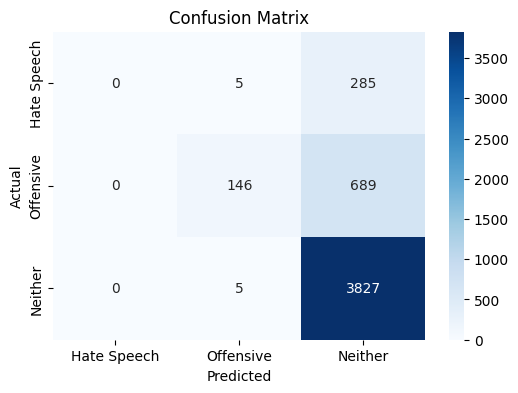

In [ ]:
# Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Hate Speech', 'Offensive', 'Neither'], yticklabels=['Hate Speech', 'Offensive', 'Neither'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Function to predict new comments

def predict_comment(text):

    processed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([processed_text])
    prediction = model.predict(text_vectorized)[0]

    return prediction


Enter your text:Go die in a corner
Prediction: Offensive Language


In [ ]:
# Prediction on User Input

#new_comment = "I hate you!"
new_comment = input("Enter your text:")
result = predict_comment(new_comment)
print(f"Prediction: {result}")


In [ ]:
# Save the trained model

import pickle

model_filename = 'hate_speech_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Trained model saved as {model_filename}")


vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

print(f"Fitted vectorizer saved as {vectorizer_filename}")


Trained model saved as hate_speech_model.pkl
Fitted vectorizer saved as tfidf_vectorizer.pkl


In [ ]:
# Load the trained model

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

model_filename = 'hate_speech_model.pkl'
with open(model_filename, 'rb') as file:
    #loaded_model = pickle.load(file)
    model = pickle.load(file)

print(f"Loaded trained model from {model_filename}")


vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'rb') as file:
    #loaded_vectorizer = pickle.load(file)
    vectorizer = pickle.load(file)

print(f"Loaded fitted vectorizer from {vectorizer_filename}")


Loaded trained model from hate_speech_model.pkl
Loaded fitted vectorizer from tfidf_vectorizer.pkl


In [ ]:
# Prediction on User Input

#new_comment = "I hate you!"
new_comment = input("Enter your text:")
result = predict_comment(new_comment)
print(f"Prediction: {result}")


Enter your text:It's so good I want to die for it
Prediction: Offensive Language
